In [1]:
from visualize_utils import *
import torch

/home/zhouy/miniconda3/envs/da2/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
models = load_decompose_model()

/home/zhouy/miniconda3/envs/da2/lib/python3.9/site-packages/torchvision/models/_utils.py:135: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and may be removed in the future. Please use keyword parameter(s) instead.
  warnings.warn(
/home/zhouy/miniconda3/envs/da2/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


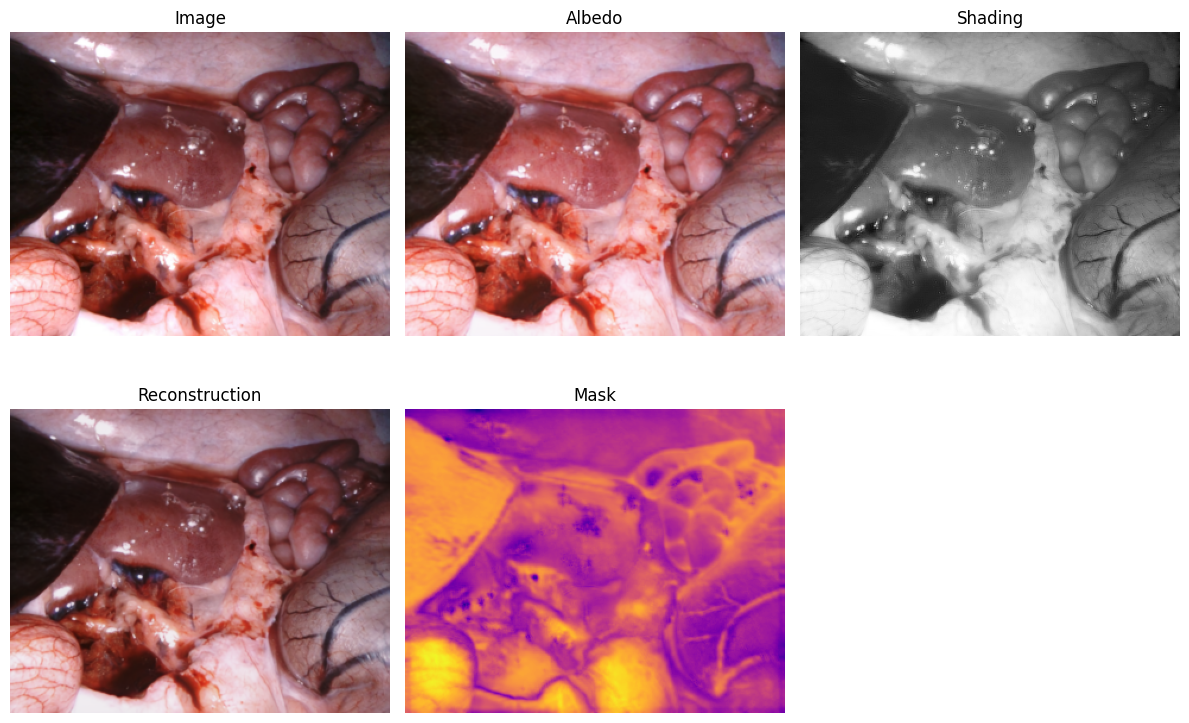

In [7]:
image_loader = ImageLoader(4, 1)
image = image_loader.single(1)
decompose_feats = models["decompose_encoder"](image)
decompose = models["decompose"](decompose_feats, image)

A, S, M = decompose["A"], decompose["S"], decompose["M"]
recons = A * S
plot_images([image, A, S, recons, M], 2, ["Image", "Albedo", "Shading", "Reconstruction", "Mask"], cmaps = ["", "", "gray", "", "plasma"])


In [11]:
models["decompose"].eval()

DecomposeDecoder(
  (decoder): ModuleList(
    (0-1): 2 x ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (2-3): 2 x ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(256, 128, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (4-5): 2 x ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (6): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1, 1))
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
      )
      (nonlin): ELU(alpha=1.0, inplace=True)
    )
    (7): ConvBlock(
      (conv): Conv3x3(
        (pad): ReflectionPad2d((1, 1, 1